In [2]:
import math
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt



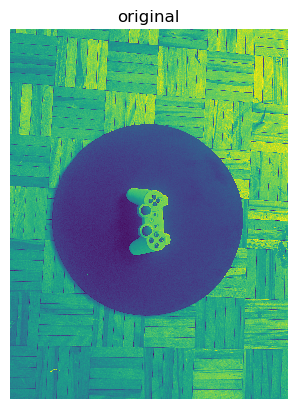

In [3]:
# Load the original image
image = cv2.imread('ps_black.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image)
plt.axis('off') 
plt.title('original')
plt.show()


In [4]:


# def find_circles(image):
#     img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
#     assert img is not None, "File could not be read, check with os.path.exists()"
#     img = cv2.medianBlur(img, 5)
#     cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
#     circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20,
#                                param1=50, param2=30, minRadius=0, maxRadius=0)
#     circles = np.uint16(np.around(circles))
#     for i in circles[0,:]:
#         cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
#         cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)


#     plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
#     plt.axis('off')
#     plt.show()
#     return cimg, circles



img = cv2.medianBlur(gray_image, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=50, param2=30, minRadius=0, maxRadius=0)


circles = np.uint16(np.around(circles))
for i in circles[0,:1]:
    cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
    cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)



# Extract parameters of the first detected circle
x, y, r = circles[0, 0]

# Calculate inward offset
inward_offset = 20
offset = int(inward_offset / math.sqrt(2))

# Adjust radius with inward offset
r -= offset

# Draw outer circle
cv2.circle(cimg, (x, y), r, (255, 0, 0), 2)

# Draw inner circle
cv2.circle(cimg, (x, y), r - 10, (0, 255, 0), 2)

# Display the detected circles
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Detected Circles")
plt.show()


Create edges points off the offset circle

In [ ]:
contours, _ = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract edge points of the circle
edge_points = []
for contour in contours:
    for point in contour:
        edge_points.append(point[0])

    # Print edge points
    print("Edge points:", edge_points)

In [ ]:
# def process_roi(original_image, circles, second_image_path):
#     for circle in circles[0]:
#         x, y, r = circle
#         roi = original_image[y-r:y+r, x-r:x+r].copy()

#         second_image = cv2.imread(second_image_path)
#         second_image_resized = cv2.resize(second_image, (2*r, 2*r))

#         processed_roi = cv2.Canny(second_image_resized, 100, 200)

#         original_image[y-r:y+r, x-r:x+r][processed_roi > 0] = processed_roi[processed_roi > 0]

#     plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
#     plt.axis('off')
#     plt.show()

#     return original_image


print("Step 2: Processing regions of interest within circles...")
processed_image = cimg.copy()
for circle in circles[0]:
    x, y, r = circle
    roi = processed_image[y-r:y+r, x-r:x+r].copy()

    second_image_path = 'second_image.jpg'
    second_image = cv2.imread(second_image_path)
    second_image_resized = cv2.resize(second_image, (2*r, 2*r))



    # here is where i add the object detection script viteeeeee
    
    processed_roi = cv2.Canny(second_image_resized, 100, 200)

  
    processed_image[y-r:y+r, x-r:x+r][processed_roi > 0] = processed_roi[processed_roi > 0]

plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Processed Image")
plt.show()

In [ ]:
# if __name__ == "__main__":
#     # Load the original image
#     original_image_path = 'original_image.jpg'
#     original_image = cv2.imread(original_image_path)

#     # Find circles in the original image
#     circles_image, circles = find_circles(original_image_path)

#     # Process ROI within circles using another image
#     second_image_path = 'second_image.jpg'
#     processed_image = process_roi(original_image.copy(), circles, second_image_path)

#     # Display the result
#     cv2.imshow('Result', processed_image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

# cv2.destroyAllWindows()